In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
X = iris['data'][:, 3:]
X_c = np.c_[np.ones((len(iris['target']), 1)), X]

In [5]:
#Detect iris virginica
y = (iris['target'] == 2).astype(int).reshape(len(iris['target']), 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Apliación del descenso de gradiente

In [6]:
def sigmoid(z):
    return 1 / (1 + np. exp(- z))

In [7]:
eta = 0.5
n_iterations = 100000
m = len(y)

In [8]:
theta = np.random.randn(2, 1)
theta

array([[-0.71627903],
       [ 0.50106519]])

In [9]:
for i in range(n_iterations):
    gradients = (1/m) * (X_c.T @ (sigmoid(X_c @ theta) - y))
    theta = theta - gradients

theta

array([[-21.12564008],
       [ 12.94750723]])

1.6336336336336337


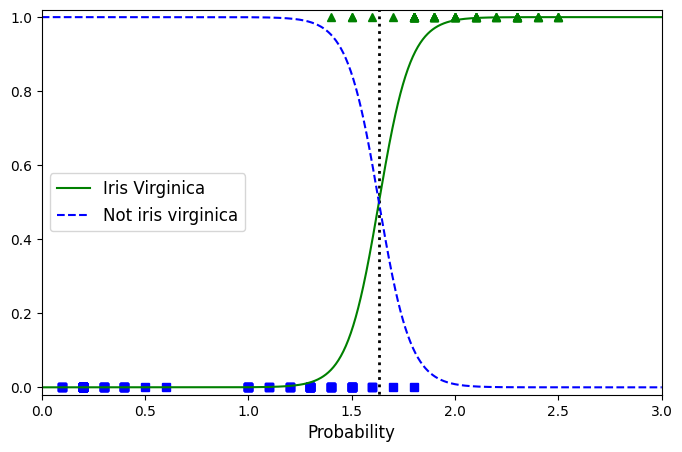

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new_c = np.c_[np.ones((1000, 1)), X_new]
y_proba = sigmoid(theta.T @ X_new_c.T)

decision_Boundary = X_new[y_proba.reshape(-1, 1) >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba.T, 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba.T, 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

## Aplicando la libreria sklearn la clase LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(C = 10**10)
model.fit(X, y.ravel())

LogisticRegression(C=10000000000)

[1.63363363]


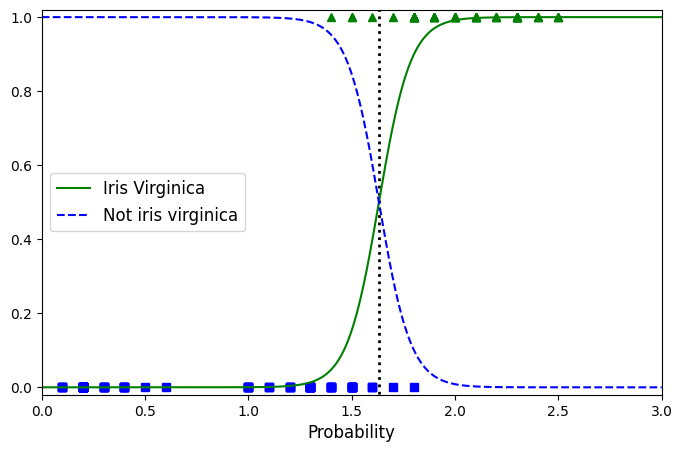

In [13]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = model.predict_proba(X_new)

decision_Boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize = (8, 5))
plt.plot(X[y == 0], y[y == 0], 'bs', markersize = 6)
plt.plot(X[y == 1], y[y == 1], 'g^', markersize = 6)
plt.plot([decision_Boundary, decision_Boundary], [-1, 2], 'k:', linewidth = 2)
print(decision_Boundary)

plt.plot(X_new, y_proba[:, 1], 'g-', label = "Iris Virginica")
plt.plot(X_new, 1 - y_proba[:, 1], 'b--', label = "Not iris virginica")
plt.xlabel('X', fontsize = 12)
plt.xlabel('Probability', fontsize = 12)
plt.legend(loc = 'center left', fontsize = 12)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [14]:

y_proba

array([[9.99999999e-01, 6.68990990e-10],
       [9.99999999e-01, 6.95514100e-10],
       [9.99999999e-01, 7.23088756e-10],
       ...,
       [2.18558172e-08, 9.99999978e-01],
       [2.10223556e-08, 9.99999979e-01],
       [2.02206778e-08, 9.99999980e-01]])